In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
dataset = pd.read_csv('dataset.csv')
dataset.describe(include='all')
dataset.isnull().sum()
#droping not required records(not needed columns)
dataset.dropna(inplace=True)
dataset.drop(['URL', 'CONTENT_LENGTH', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
             'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)
print(dataset.isnull().sum())


URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [2]:
dataset.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,967.000000,967.000000,967.000000,967.000000
mean,55.560496,10.808687,16.964840,3.469493,3.188211,1720.409514,19.352637,19.382627,1.702195e+04,1904.967942,19.352637,2.380558,0.109617
std,25.572456,4.124311,45.139866,6.889008,3.369843,3925.800938,46.072438,50.036140,7.942383e+04,4017.962471,46.072438,2.821823,0.312574
min,16.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,49.000000,10.000000,8.000000,0.000000,2.000000,762.000000,10.000000,10.000000,8.220000e+02,880.000000,10.000000,0.000000,0.000000
75%,66.500000,12.000000,22.000000,4.000000,5.000000,2332.500000,26.000000,25.000000,9.382000e+03,2765.500000,26.000000,4.000000,0.000000
max,249.000000,43.000000,1194.000000,58.000000,17.000000,99843.000000,1198.000000,1284.000000,2.060012e+06,100151.000000,1198.000000,20.000000,1.000000


In [3]:

dataset['Type'].value_counts()


0    861
1    106
Name: Type, dtype: int64

In [4]:
df_centered = dataset.apply( lambda x: x-x.mean())
df_centered.describe().applymap("{0:.5f}".format)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000
mean,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000
std,25.57246,4.12431,45.13987,6.88901,3.36984,3925.80094,46.07244,50.03614,79423.83367,4017.96247,46.07244,2.82182,0.31257
min,-39.56050,-4.80869,-16.96484,-3.46949,-3.18821,-1720.40951,-19.35264,-19.38263,-17021.94623,-1904.96794,-19.35264,-2.38056,-0.10962
25%,-16.56050,-2.80869,-16.96484,-3.46949,-3.18821,-1720.40951,-19.35264,-19.38263,-17021.94623,-1904.96794,-19.35264,-2.38056,-0.10962
50%,-6.56050,-0.80869,-8.96484,-3.46949,-1.18821,-958.40951,-9.35264,-9.38263,-16199.94623,-1024.96794,-9.35264,-2.38056,-0.10962
75%,10.93950,1.19131,5.03516,0.53051,1.81179,612.09049,6.64736,5.61737,-7639.94623,860.53206,6.64736,1.61944,-0.10962
max,193.43950,32.19131,1177.03516,54.53051,13.81179,98122.59049,1178.64736,1264.61737,2042990.05377,98246.03206,1178.64736,17.61944,0.89038


In [5]:
import seaborn as sns
#min max normalization
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
df_norm.describe().applymap("{0:.5f}".format)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000
mean,0.16979,0.12996,0.01421,0.05982,0.18754,0.01723,0.01615,0.01510,0.00826,0.01902,0.01615,0.11903,0.10962
std,0.10975,0.11147,0.03781,0.11878,0.19823,0.03932,0.03846,0.03897,0.03856,0.04012,0.03846,0.14109,0.31257
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.09871,0.05405,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.14163,0.10811,0.00670,0.00000,0.11765,0.00763,0.00835,0.00779,0.00040,0.00879,0.00835,0.00000,0.00000
75%,0.21674,0.16216,0.01843,0.06897,0.29412,0.02336,0.02170,0.01947,0.00455,0.02761,0.02170,0.20000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [6]:
Y = dataset['Type']
X = dataset.drop(['Type'], axis='columns')

In [7]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.914616,0.018584,0.071610,0.053408,0.016469,0.018902,0.013793,0.012381,0.017463,0.018902,0.011702,-0.183955
NUMBER_SPECIAL_CHARACTERS,0.914616,1.000000,0.018174,0.054938,0.057562,0.019724,0.021984,0.016633,0.007171,0.023288,0.021984,0.069238,-0.026275
TCP_CONVERSATION_EXCHANGE,0.018584,0.018174,1.000000,0.235672,0.307239,0.976480,0.998291,0.993865,0.972554,0.970667,0.998291,0.300822,0.000347
DIST_REMOTE_TCP_PORT,0.071610,0.054938,0.235672,1.000000,0.442912,0.314607,0.258648,0.236733,0.137946,0.331813,0.258648,0.453453,-0.136900
REMOTE_IPS,0.053408,0.057562,0.307239,0.442912,1.000000,0.337006,0.334414,0.289318,0.154791,0.359046,0.334414,0.543964,0.048205
APP_BYTES,0.016469,0.019724,0.976480,0.314607,0.337006,1.000000,0.981002,0.971596,0.931299,0.998748,0.981002,0.394992,0.022187
SOURCE_APP_PACKETS,0.018902,0.021984,0.998291,0.258648,0.334414,0.981002,1.000000,0.993040,0.963407,0.978080,1.000000,0.356007,0.017656
REMOTE_APP_PACKETS,0.013793,0.016633,0.993865,0.236733,0.289318,0.971596,0.993040,1.000000,0.978830,0.966535,0.993040,0.312929,0.003206
SOURCE_APP_BYTES,0.012381,0.007171,0.972554,0.137946,0.154791,0.931299,0.963407,0.978830,1.000000,0.919344,0.963407,0.169382,-0.036737
REMOTE_APP_BYTES,0.017463,0.023288,0.970667,0.331813,0.359046,0.998748,0.978080,0.966535,0.919344,1.000000,0.978080,0.440278,0.036317


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y,
                     test_size=0.20,
                     stratify=Y,
                     random_state=1)

In [9]:
Y_train.value_counts()

0    688
1     85
Name: Type, dtype: int64

In [10]:
from sklearn.svm import LinearSVC
Lin_SVC = LinearSVC(C=10).fit(X_train, Y_train)

d:\anaconda_\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.metrics import accuracy_score
predict_test = Lin_SVC.predict(X_test)
accuracy_score(Y_test, predict_test)

0.8195876288659794

In [12]:
predict_train = Lin_SVC.predict(X_train)
accuracy_score(Y_train, predict_train)

0.7567917205692108

In [13]:
from sklearn import metrics
conf_matrix_rf = metrics.confusion_matrix(Y_test, predict_test)
print(conf_matrix_rf)

[[147  26]
 [  9  12]]


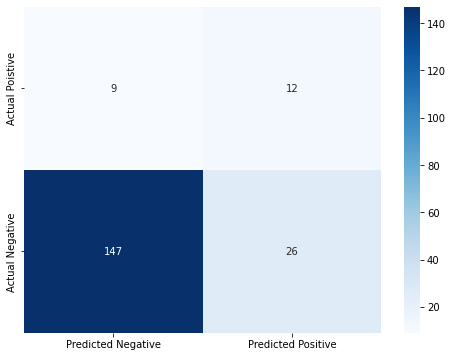

In [14]:
#1confusion matrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# cf_matrix = confusion_matrix (Y_test, predict_test)
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()
cfm = conf_matrix_rf
lbl1=["Predicted Negative", "Predicted Positive"]
lbl2=["Actual Negative", "Actual Poistive"]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
ax.set_ylim([0,2])
plt.show()

In [15]:
#precision for validation param 
from sklearn.metrics import precision_score
precision_score(Y_test, predict_test, average = None)

array([0.94230769, 0.31578947])

In [16]:
#precision for train param 
precision_score(Y_train, predict_train, average = None)

array([0.93706294, 0.24378109])

In [17]:
#recall for train param
from sklearn.metrics import recall_score
recall_score(Y_train, predict_train, average = None)

array([0.77906977, 0.57647059])

In [18]:
#recall for validation param
recall_score(Y_test, predict_test, average = None)

array([0.84971098, 0.57142857])

In [19]:
#F1 score for train param
from sklearn.metrics import f1_score
f1_score(Y_train, predict_train, average = None)

array([0.85079365, 0.34265734])

In [20]:
#F1 score for validation param
f1_score(Y_test, predict_test, average = None)

array([0.89361702, 0.40677966])

In [21]:
from sklearn.svm import SVC
SVC_k = SVC(kernel = 'linear').fit(X_train, Y_train)

In [22]:
predict = SVC_k.predict(X_test)
accuracy_score(Y_test, predict)

0.9175257731958762

In [23]:
#2. модель з лінійним ядром і меншим С
from sklearn.svm import LinearSVC
Lin_SVC = LinearSVC(C=2.5).fit(X_train, Y_train)

d:\anaconda_\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# 3. різні ступені степені, гіперпараметр коеф
SVC_3 = SVC(kernel='poly', degree = 3, coef0 = 0).fit(X_train, Y_train)


In [25]:
predict_3 = SVC_3.predict(X_test)
accuracy_score(Y_test, predict_3)

0.8917525773195877

In [26]:
SVC_3b = SVC(kernel='poly', degree=10, coef0=0.5).fit(X_train, Y_train)

In [27]:
predict_3b = SVC_3b.predict(X_test)
accuracy_score(Y_test, predict_3b)

0.8865979381443299

In [28]:
#4. kerner = rbf, з ядром гаусівська радіальна базисна функція
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

kombaine = SVC(kernel='rbf')
parameters = {'gamma': [0.1, 10],
              'C': [0.01, 1, 100]}

kombaine_gridsearch = GridSearchCV(
    kombaine, parameters, cv=5)


In [29]:
kombaine_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'gamma': [0.1, 10]})

In [30]:
print(
    f'Best score: {kombaine_gridsearch.best_score_}, Best parameters: {kombaine_gridsearch.best_params_}')


Best score: 0.8951989945538333, Best parameters: {'C': 1, 'gamma': 0.1}


In [31]:
#5 знайти гіперпараметри С та degree решітчатим пошуком
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

grill = SVC()
param_grid = {'C': [0.01, 1, 100],
              'degree': [0.1, 10, 1]}

grill_gridsearch = GridSearchCV(grill, param_grid, cv = 10)
grill_gridsearch.fit(X_train, Y_train)
print(
    f'Best score: {grill_gridsearch.best_score_}, Best parameters: {grill_gridsearch.best_params_}')


Best score: 0.8900599400599403, Best parameters: {'C': 0.01, 'degree': 0.1}


d:\anaconda_\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda_\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\anaconda_\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(<Figure size 432x432 with 1 Axes>, StandardScaler(), PCA(n_components=2))

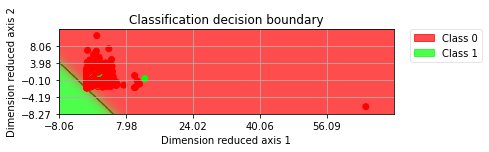

In [32]:
from sklearn import datasets, linear_model, tree, ensemble
from pylib import plot as pyplt
model = linear_model.LogisticRegression()
model.fit(X, Y)
pyplt.plot_decision_boundary(model, X=X, Y=Y)

In [33]:
#scaled
sc = StandardScaler()
scaler = sc.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.neural_network import MLPClassifier
# mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp_clf = MLPClassifier(max_iter=300, activation='relu', solver='adam', random_state=1)

In [35]:
#train first MLP
mlp_clf.fit(x_train_scaled, Y_train)

d:\anaconda_\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [36]:
y_pred = mlp_clf.predict(x_test_scaled)
print ('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.96


d:\anaconda_\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


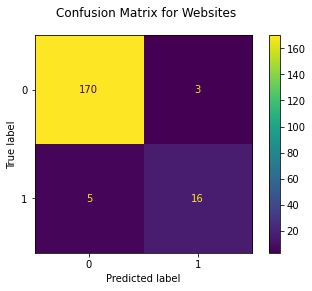

In [37]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(mlp_clf, x_test_scaled, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Websites")
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       173
           1       0.84      0.76      0.80        21

    accuracy                           0.96       194
   macro avg       0.91      0.87      0.89       194
weighted avg       0.96      0.96      0.96       194



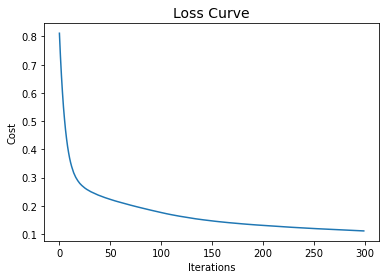

In [39]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
Висновок
Для даного випадку одношарової моделі також достатньо, адже результат досить високий